In [55]:
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,Bidirectional
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed
import pickle

In [56]:
CSV_PATH = "dataset/cases_malaysia.csv"
df = pd.read_csv(CSV_PATH, index_col='date',parse_dates=['date'])
MODEL_PATH = os.path.join(os.getcwd(),'Model','model.pkl')

In [57]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1744 entries, 2020-01-25 to 2024-11-02
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                1744 non-null   int64  
 1   cases_import             1744 non-null   int64  
 2   cases_recovered          1744 non-null   int64  
 3   cases_active             1744 non-null   int64  
 4   cases_cluster            1744 non-null   int64  
 5   cases_unvax              1744 non-null   int64  
 6   cases_pvax               1744 non-null   int64  
 7   cases_fvax               1744 non-null   int64  
 8   cases_boost              1744 non-null   int64  
 9   cases_child              1744 non-null   int64  
 10  cases_adolescent         1744 non-null   int64  
 11  cases_adult              1744 non-null   int64  
 12  cases_elderly            1744 non-null   int64  
 13  cases_0_4                1744 non-null   int64  
 14  cases_

In [58]:
# date_time = pd.to_datetime(df.pop('date'),format= "%Y-%m-%d")

In [59]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cases_new,1744.0,3050.001720,5588.837322,0.0,128.75,803.0,3200.00,33406.0
cases_import,1744.0,22.502867,76.601202,0.0,1.00,3.0,8.00,719.0
cases_recovered,1744.0,3023.658257,5540.421141,0.0,117.75,796.5,3227.50,33872.0
cases_active,1744.0,37942.768922,61800.088695,1.0,8460.25,13839.0,36568.00,323791.0
cases_cluster,1744.0,306.498280,619.205875,0.0,0.00,7.0,269.25,3394.0
cases_unvax,1744.0,1172.648509,2339.900620,0.0,24.00,125.0,1162.75,12681.0
cases_pvax,1744.0,250.495413,997.565343,0.0,0.00,2.0,19.00,7315.0
cases_fvax,1744.0,813.951261,1935.319149,0.0,1.00,44.0,439.00,13058.0
cases_boost,1744.0,812.906537,2248.538349,0.0,0.00,83.0,496.25,18176.0
cases_child,1744.0,371.459289,772.875075,0.0,8.75,48.0,245.25,4389.0


In [60]:
#To check duplicates
df.duplicated().sum()

10

In [61]:
#To drop the duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [62]:
df['cases_new'] = pd.to_numeric(df['cases_new'],errors='coerce') 

In [63]:
#Fill in

df['cases_new'] = df['cases_new'].fillna(df['cases_new'].fillna(0))
df['cluster_import'] = df['cases_new'].fillna(df['cluster_import'].fillna(0))
df['cluster_religious'] = df['cases_new'].fillna(df['cluster_religious'].fillna(0))
df['cluster_community'] = df['cases_new'].fillna(df['cluster_community'].fillna(0))
df['cluster_highRisk'] = df['cases_new'].fillna(df['cluster_highRisk'].fillna(0))
df['cluster_education'] = df['cases_new'].fillna(df['cluster_education'].fillna(0))
df['cluster_detentionCentre'] = df['cases_new'].fillna(df['cluster_detentionCentre'].fillna(0))
df['cluster_workplace'] = df['cases_new'].fillna(df['cluster_workplace'].fillna(0))

In [64]:
df.isna().sum()

cases_new                  0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64

In [65]:
df.boxplot(rot=90)

<Axes: >

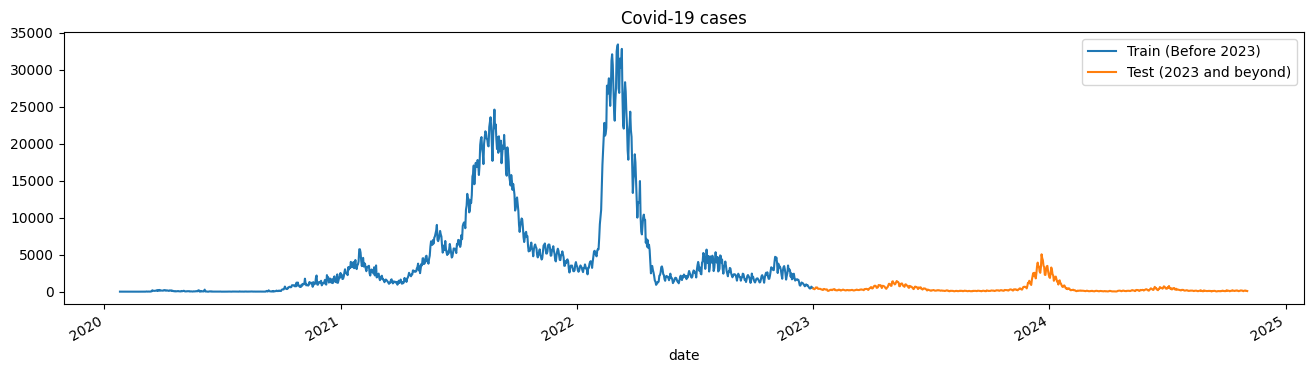

In [82]:
tstart = 2020
tend = 2022

def train_test_plot(df,tstart,tend):
    df.loc[f'{tstart}':f'{tend}','cases_new'].plot(figsize=(16,4),label=f"Train (Before {tend+1})")
    df.loc[f'{tend+1}':, 'cases_new'].plot(figsize=(16,4),label=f"Test ({tend+1} and beyond)")
    plt.legend()
    plt.title('Covid-19 cases')
    plt.show()

train_test_plot(df,tstart,tend)

In [67]:
def train_test_split(dataset,tstart,tend):
    train = dataset.loc[f"{tstart}":f"{tend}","cases_new"].values
    test = dataset.loc[f"{tend+1}":,"cases_new"].values
    return train,test

training_set,test_set = train_test_split(df,tstart,tend)

In [68]:
sc = MinMaxScaler(feature_range=(0,1))
training_set = training_set.reshape(-1,1)
training_set_scaled = sc.fit_transform(training_set)
# print(type(training_set_scaled))
# print(training_set_scaled.shape)
print(training_set_scaled[:5])

[[1.19738969e-04]
 [0.00000000e+00]
 [8.98042268e-05]
 [2.99347423e-05]
 [0.00000000e+00]]


In [69]:
# arr = np.array([1,2,3,4,5,6])
# print(arr.shape)

# print(arr.reshape(3,-1).shape)

In [70]:
def split_sequence(sequence,n_steps):
    X,y = list(),list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x,seq_y = sequence[i:end_ix],sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)

n_steps = 30
features = 1
# split into samples
X_train,y_train = split_sequence(training_set_scaled,n_steps)

In [71]:
# Reshape X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)
print(X_train.shape)

(1032, 30, 1)


c:\AiClassLatest\envs\tensorflow_cpu\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,249 (114.25 KB)

 Trainable params: 29,249 (114.25 KB)

 Non-trainable params: 0 (0.00 B)

None


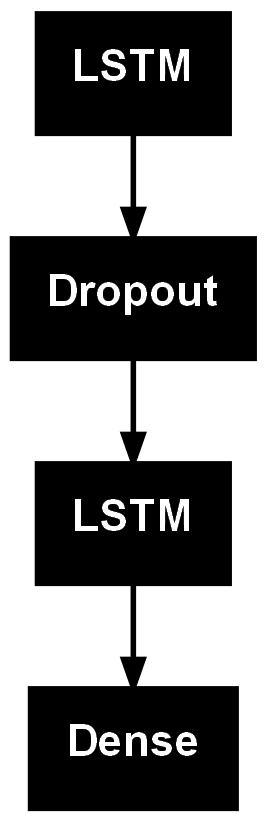

In [72]:
# The LSTM Architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=32,activation='tanh',input_shape=(n_steps,features),return_sequences=True))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(units=64)) #LSTM layer
model_lstm.add(Dense(units=1)) #Output
# Compiling the model
model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(model_lstm.summary())
keras.utils.plot_model(model_lstm)


In [73]:
es = keras.callbacks.EarlyStopping (patience=2, verbose=1)
logpath = 'tensorboard/covid19_latest/' + datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S')
tb= keras.callbacks.TensorBoard(logpath)
history = model_lstm.fit(X_train, 
                        y_train, 
                        epochs= 50,
                        batch_size=32,
                        callbacks =[es, tb])

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0293 - mae: 0.0982
Epoch 2/50
 5/33 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0051 - mae: 0.0359

c:\AiClassLatest\envs\tensorflow_cpu\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0044 - mae: 0.0356
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0018 - mae: 0.0241
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0015 - mae: 0.0216
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0018 - mae: 0.0238
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0020 - mae: 0.0226
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0016 - mae: 0.0223
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0017 - mae: 0.0226
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0015 - mae: 0.0221
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0014 - mae: 0.0213
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0022 - mae: 0.0259
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0016 - mae: 0.0230
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0016 - mae: 0.0223
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/

In [74]:
dataset_total = df.loc[:,'cases_new']
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1,1)
# scaling
inputs = sc.transform(inputs)

# Split into samples
X_test,y_test = split_sequence(inputs,n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],features)
# predictions
predicted_new_cases_covid_19 = model_lstm.predict(X_test)
# inverse transform the values - undo the normalization of stock prices (undo any sklearn's transform)
predicted_new_cases_covid_19 = sc.inverse_transform(predicted_new_cases_covid_19)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [75]:
def plot_predictions(test,predicted):
    plt.plot(test,color='purple',label='Real')
    plt.plot(predicted,color='gray',label='Predicted')
    plt.title('Covid-19 cases Prediction')
    plt.xlabel('Day')
    plt.ylabel('Covid-19 cases')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = np.sqrt(mean_squared_error(test,predicted))
    print('The root mean square error is {:.2f}.'.format(rmse))
 

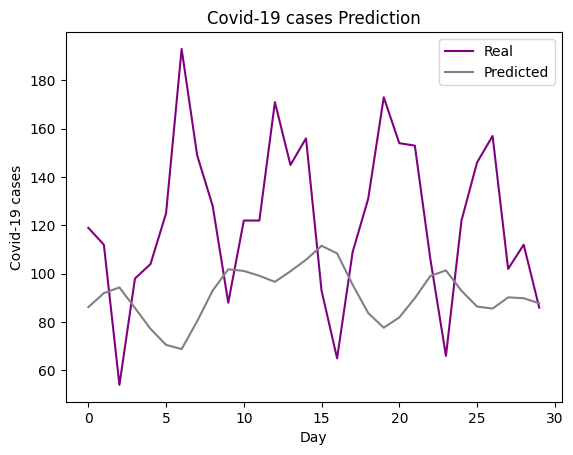

In [76]:
plot_predictions(test_set[-30:],predicted_new_cases_covid_19[-30:])

In [77]:
#Evaluation of Model
evaluation = model_lstm.evaluate(X_test,y_test)
print(evaluation)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.5563e-05 - mae: 0.0032
[4.4327480281936005e-05, 0.003232022048905492]


In [78]:
#MAE
mae = evaluation[1]
print(mae)

0.003232022048905492


In [79]:
#MAPE

mape = (mae/sum(abs(y_test))) * 100
print(mape)

[0.03690917]


In [80]:
#RMSE
print(return_rmse(test_set,predicted_new_cases_covid_19))

The root mean square error is 222.41.
None


In [81]:
# Model Saving
import pickle 

with open (MODEL_PATH, 'wb') as file:
    pickle.dump(model_lstm,file)  #to save file, use pickle.dump